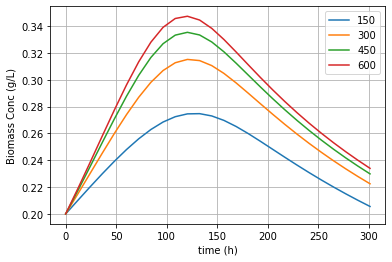

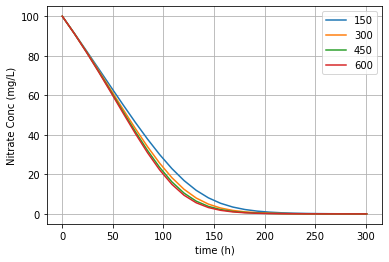

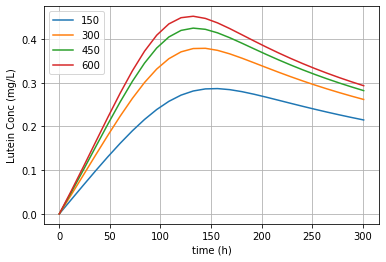

In [3]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np

def batch_process(y,t,um,ud,Kn,Yn,Yl,kd,ks,I):
    cx,cn,cl = y
    dydt = [um*(I/(I+ks))*(cn/(cn+Kn))*cx-ud*cx**(2),-Yn*um*(cn/(cn+Kn))*cx,Yl*um*(I/(I+ks))*(cn/(cn+Kn))*cx-kd*cl*cx]
    return dydt
t = np.linspace(0, 301, 26)
y0 = [0.2,100,0]
um=0.0152
ud=8.95e-3
Kn=30
Yn=305
Yl=2.304
kd=0.0106
ks=142.8
p=0
sol=dict()
for I in range (150,601,150):
    p=p+1
    sol[p]= odeint(batch_process, y0, t, args=(um,ud,Kn,Yn,Yl,kd,ks,I))

plt.plot(t, sol[1][:, 0],label = "150")
plt.plot(t, sol[2][:, 0],label = "300")
plt.plot(t, sol[3][:, 0],label = "450")
plt.plot(t, sol[4][:, 0],label = "600")
plt.xlabel('time (h)')
plt.ylabel('Biomass Conc (g/L)')
plt.grid(b=True,which='major', axis='both')
plt.legend(loc='best')
plt.show()
plt.plot(t, sol[1][:, 1],label = "150")
plt.plot(t, sol[2][:, 1],label = "300")
plt.plot(t, sol[3][:, 1],label = "450")
plt.plot(t, sol[4][:, 1],label = "600")
plt.xlabel('time (h)')
plt.ylabel('Nitrate Conc (mg/L)')
plt.grid(b=True,which='major', axis='both')
plt.legend(loc='best')
plt.show()
plt.plot(t, sol[1][:, 2],label = "150")
plt.plot(t, sol[2][:, 2],label = "300")
plt.plot(t, sol[3][:, 2],label = "450")
plt.plot(t, sol[4][:, 2],label = "600")
plt.xlabel('time (h)')
plt.ylabel('Lutein Conc (mg/L)')
plt.grid(b=True,which='major', axis='both')
plt.legend(loc='best')
plt.show()




In [2]:
import xlrd
import pandas as pd
writer = pd.ExcelWriter('batchkineticdata.xlsx', engine='xlsxwriter')
for P in range (1,5):
    df = pd.DataFrame(sol[P])
    df.to_excel(writer,startrow=((P-1)*26),header=False,
                index=True,index_label=['Time (h)'])
writer.save()